In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


In [3]:
df = pd.read_csv('/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv')

# Data Overview

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df.shape

(10000, 10)

In [7]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [8]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [9]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]

In [10]:
df.sample(4)

,UDI,Product ID,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
1863,1864,M16723,M,25.75,35.55,1517,39.5,69,0,No Failure,9.8
3987,3988,M18847,M,30.15,39.15,1444,43.1,115,0,No Failure,9.0
5821,5822,L53001,L,29.15,38.95,1303,49.2,212,0,No Failure,9.8
4918,4919,L52098,L,31.15,40.05,1457,40.7,48,0,No Failure,8.9


# Descriptive Stats

In [11]:
df.describe().style.background_gradient(cmap="magma")

,UDI,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2886.895680,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,1.000000,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,2500.750000,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,5000.500000,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,7500.250000,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,10000.000000,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


# Exploratory Data Analysis

**Distribution of temperatures**

In [12]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [°C]',
       'Process temperature [°C]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type',
       'Temperature difference [°C]'],
      dtype='object')

In [13]:
df = df.drop('UDI', axis = 1)

# Temperature

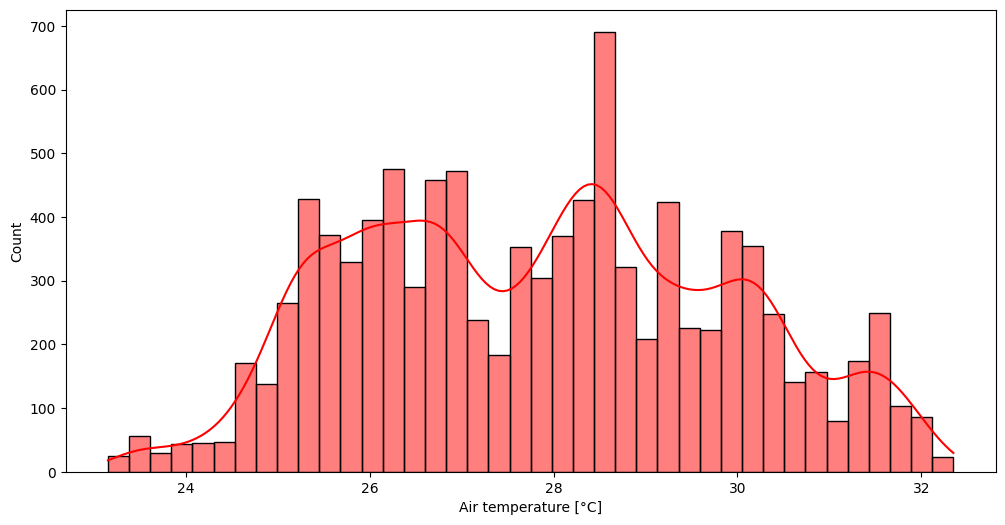

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'Air temperature [°C]', data =df, bins = 40, kde = True, color='r')
plt.show()

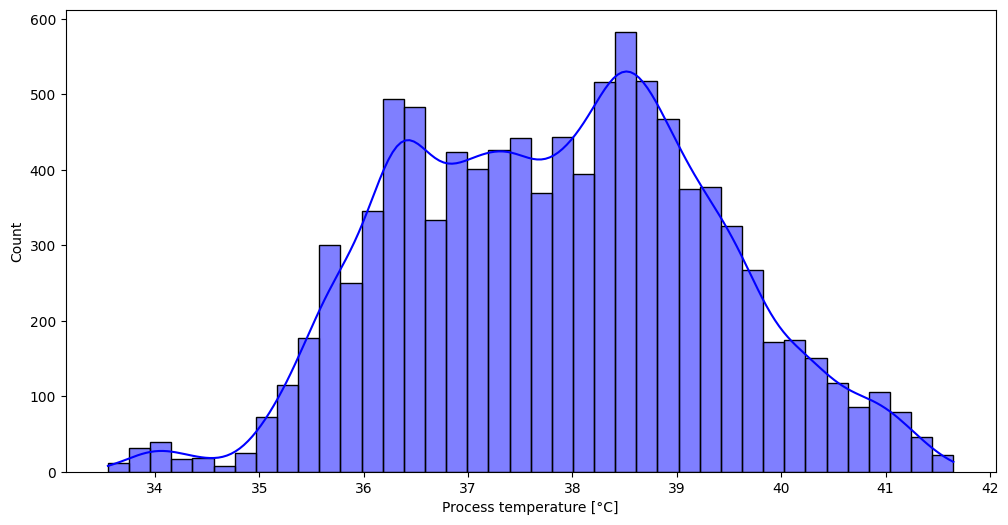

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'Process temperature [°C]', data =df, bins = 40, kde = True, color='b')
plt.show()

# Type

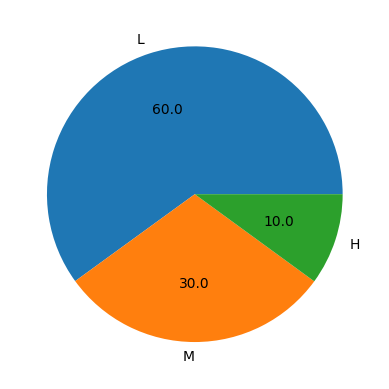

In [16]:
df['Type'].value_counts().plot(kind = 'pie', autopct = '%.1f')
plt.ylabel(None)
plt.show()

<Axes: ylabel='Type'>

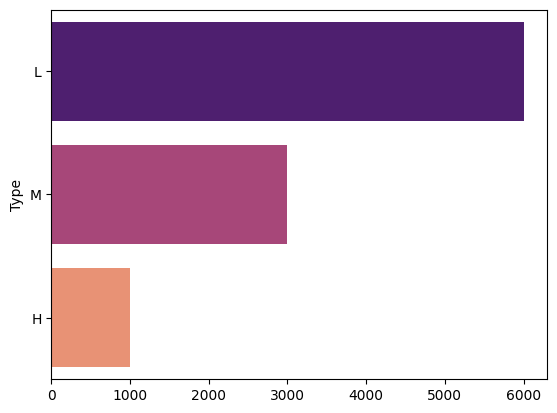

In [17]:
df1 = df['Type'].value_counts()
sns.barplot(x = df1.values, y = df1.index, palette = 'magma')

# Speed

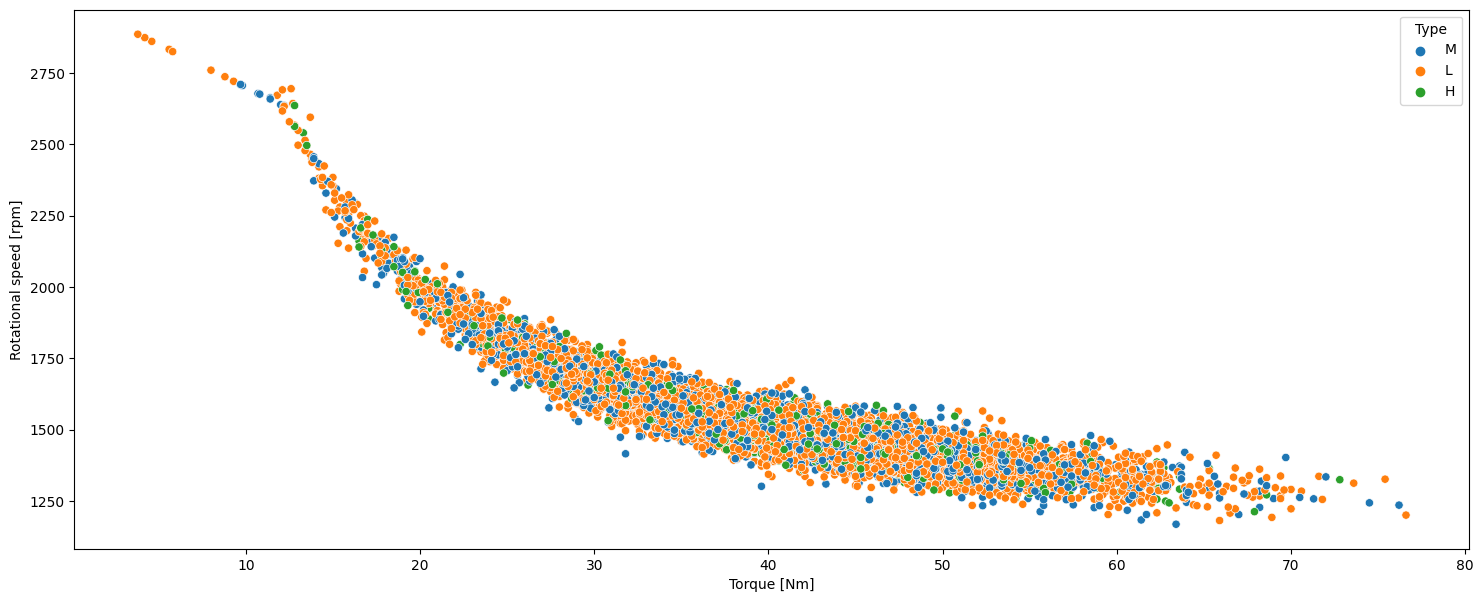

In [18]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type");

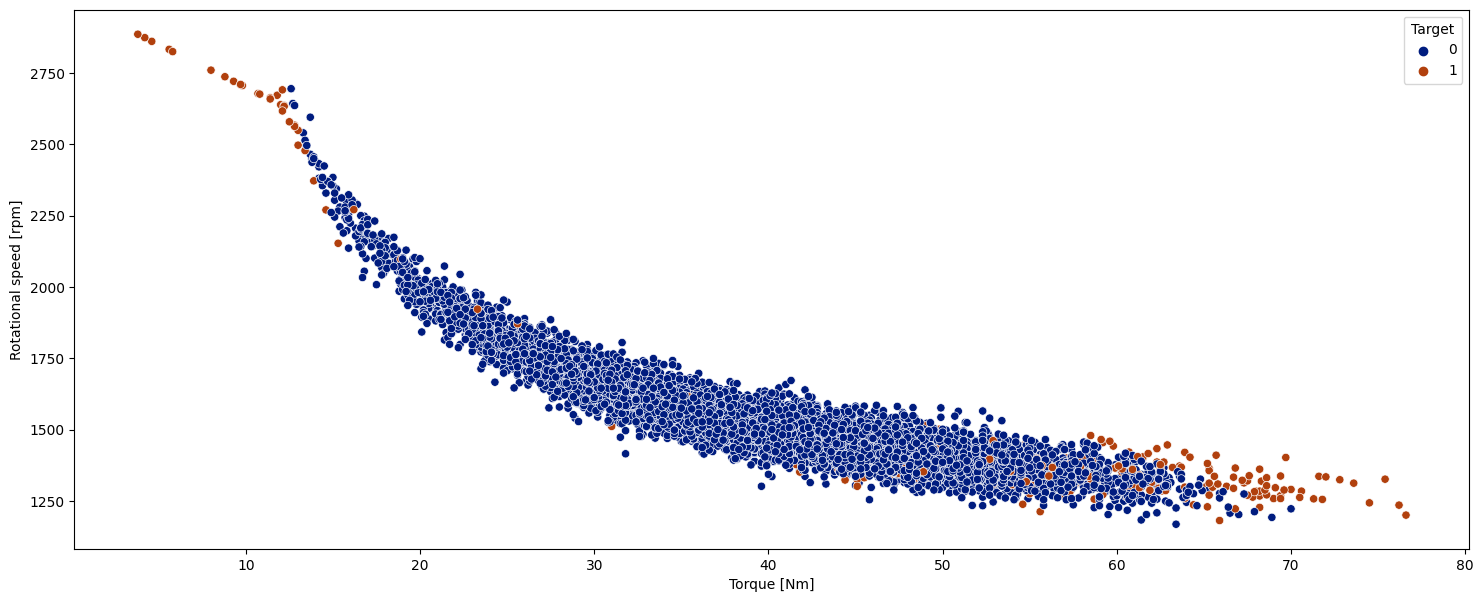

In [19]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="dark");

# Distribution of Failure

Text(0, 0.5, '')

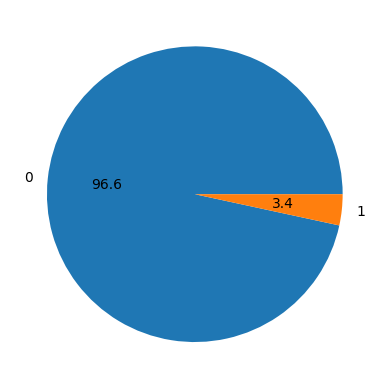

In [20]:
df['Target'].value_counts().plot(kind = 'pie', autopct = '%.1f')
plt.ylabel(None)

In [21]:
df.drop('Product ID', axis = 1,inplace = True)
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5


# Data Preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [23]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Testing Accuracy:",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 96.75 %
Testing Accuracy: 96.25 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.67      0.38      0.48        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.27      0.23      0.24      2000
weighted avg       0.93      0.96      0.95      2000

--------------------------------------------------------


In [30]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[1919,    0,    0,    2,    0,    0],
       [  18,    0,    0,    0,    0,    1],
       [   9,    0,    0,    0,    0,    0],
       [  10,    0,    0,    6,    0,    0],
       [   3,    0,    0,    0,    0,    0],
       [  31,    0,    0,    1,    0,    0]])